<a href="https://colab.research.google.com/github/xRomory/CCADMACL_EXERCISES_COM231ML/blob/main/exercise_1b/Exercise1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [57]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [58]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [59]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [60]:
print(df.shape)

(200, 5)


Show summary statistics using `describe()`. `(5 pts)`

In [61]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [62]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
AnnualIncome,0
SpendingScore,0


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [63]:
data = df[['AnnualIncome','SpendingScore']]
df_data = pd.DataFrame(data)

print(df_data)

     AnnualIncome  SpendingScore
0              15             39
1              15             81
2              16              6
3              16             77
4              17             40
..            ...            ...
195           120             79
196           126             28
197           126             74
198           137             18
199           137             83

[200 rows x 2 columns]


Display the first 10 rows. `(5 pts)`

In [64]:
df_data.head(10)

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

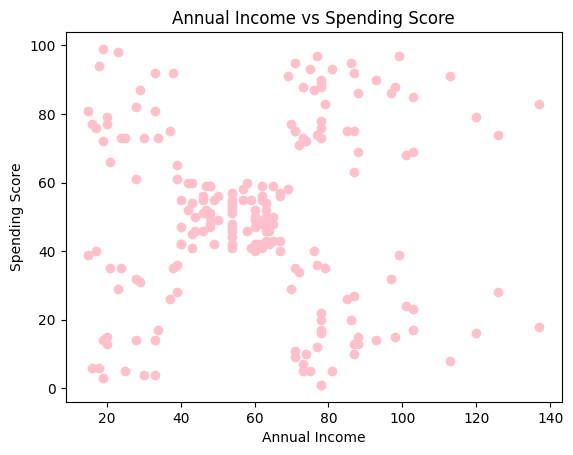

In [65]:
annual_inc = df_data.iloc[:, 0].values
spending_score = df_data.iloc[:, 1].values
plt.scatter(annual_inc, spending_score, c='pink')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

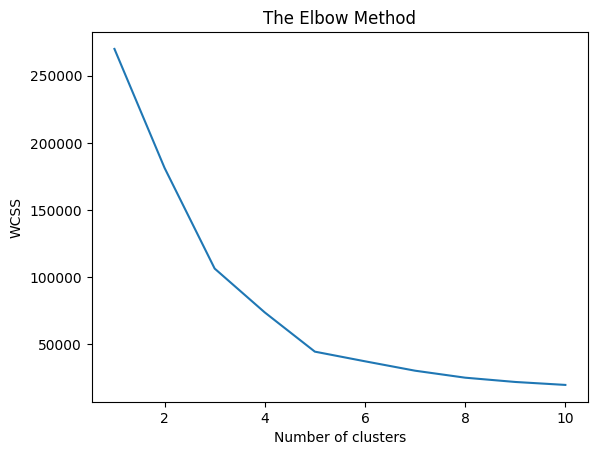

In [71]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(
      n_clusters = i,
      init='k-means++',
      max_iter=300,
      n_init=10,
      random_state=0
  )

  kmeans.fit(df_data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [73]:
kmeans_optimal = KMeans(
      n_clusters = 5,
      init='k-means++',
      max_iter=500,
      n_init=10,
      random_state=42
)
kmeans_optimal.fit(df_data)
kmeans_optimal.inertia_

44448.45544793369

## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

In [76]:
pred_kmeans = kmeans_optimal.labels_
print(pred_kmeans)

unique, counts = np.unique(pred_kmeans, return_counts=True)
dict(zip(unique, counts))

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


{np.int32(0): np.int64(81),
 np.int32(1): np.int64(39),
 np.int32(2): np.int64(22),
 np.int32(3): np.int64(35),
 np.int32(4): np.int64(23)}

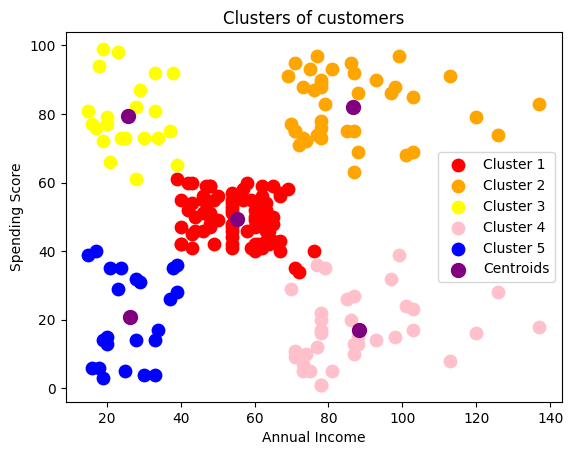

In [81]:
colors = ['red', 'orange', 'yellow', 'pink', 'blue']
x_plot = df_data.values

for clusters in range(5):
  plt.scatter(
      x_plot[pred_kmeans == clusters, 0],
      x_plot[pred_kmeans == clusters, 1],
      s=80,
      c=colors[clusters],
      label=f'Cluster {clusters+1}'
  )

centroids = kmeans_optimal.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=100,
    c='purple',
    label='Centroids'
)
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

1. Based on the plot, we can see that Cluster 4 are the users that represents high income, and low spending users

2. Based on the plot, we can see that Cluster 3 are the users that represents low income, and high spending users

3. Clusters 2 and 1 are the users that might be the target customer for promotions with the reason of they spend higher and the same time, high income

4. Business insights based on the plot
*   Cluster 1 (Red): Average income, average spending customers. This is a large segment that could be nurtured to increase their spending. General promotions and highlighting popular products might be effective
*   Cluster 2 (Orange): High income, high spending customers. These are likely the most valuable customers and should be targeted with exclusive offers and loyalty programs to retain them as they have the purchasing power. and high spender.
* Cluster 3 (Yellow): Low income, high spending customers. These could be impulse buyers or customers easily swayed by promotions. Targeted promotions and personalized recommendations might encourage continued high spending.
* Cluster 4 (Pink): High income, low spending customers. These customers have the potential to spend more. Understanding their preferences and offering tailored, higher-value products or experiences could encourage increased spending.
* Cluster 5 (Blue): Low income, low spending customers. While not currently high spenders, they might be new customers or budget-conscious. Entry-level promotions or value-for-money products could engage them and potentially move them to higher-spending segments over time.

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [ ]:
# put your answer here

Visualize using a 3D scatter plot. `(5 pts)`

In [ ]:
# put your answer here

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

In [ ]:
# put your answer here